#  Práctica 1 - Clustering

Elaborado por: Yurandir Santa María Santana Sandoval - Carné no. 18001546.

## Librerías

In [59]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Base de Datos

In [159]:
BBDD = pd.read_csv("Estaturas.csv",encoding='latin-1')

In [160]:
BBDD

,Estatura(metros),Edad(Años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


## K-Means

In [62]:
colnames = list(BBDD.columns[1:-1])
BBDD.head()

,Estatura(metros),Edad(Años)
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


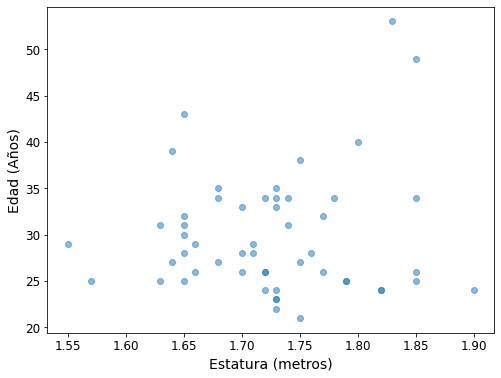

In [118]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(x=BBDD['Estatura(metros)'], y=BBDD['Edad(Años)'], alpha=0.5)

ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad (Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()x=BBDD['Estatura(metros)'], y=BBDD['Edad(Años)']

In [119]:
def initiate_centroids(k, dset):

    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = BBDD[['Estatura(metros)','Edad(Años)']]
centroids = initiate_centroids(k, df)
centroids

,Estatura(metros),Edad(Años)
19,1.75,27
41,1.63,31
47,1.63,25


In [120]:
def rsserr(a,b):

    return np.square(np.sum((a-b)**2)) 

In [121]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error del Centroide {0}: {1:.2f}'.format(i, err))

Error del Centroide 0: 81.01
Error del Centroide 1: 2401.98
Error del Centroide 2: 1.02


In [122]:
def centroid_assignation(dset, centroids):

    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
 
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)
       
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors

In [123]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,0,1.000800
1,1.74,31,1,0.000146
2,1.72,24,2,1.016266
3,1.78,34,1,81.405506
4,1.65,32,1,1.000800


In [124]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

""
0
1
2


In [125]:
def kmeans(dset, k=2, tol=1e-4):

    working_dset = dset.copy()

    err = []
    goahead = True
    j = 0
    
    centroids = initiate_centroids(k, dset)

    while(goahead):

        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids) 
        err.append(sum(j_err))
        
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        if j>0:
            
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

### Experimentos

#### Experimento 1 - K = 1

In [126]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Estatura(metros)','Edad(Años)']], 1)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,0,228.289147
1,1.74,31,0,1.536301
2,1.72,24,0,1200.923573
3,1.78,34,0,286.339680
4,1.65,32,0,19.991384


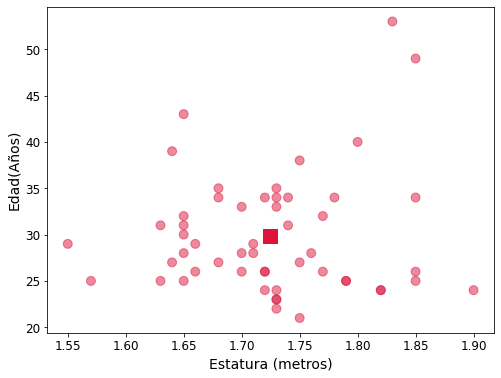

In [127]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0], 
            cmap = customcmap)
ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad(Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Experimento 1 - K = 2

In [128]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Estatura(metros)','Edad(Años)']], 2)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,0,0.002520
1,1.74,31,1,699.555431
2,1.72,24,0,10.067003
3,1.78,34,1,21.109261
4,1.65,32,1,294.789628


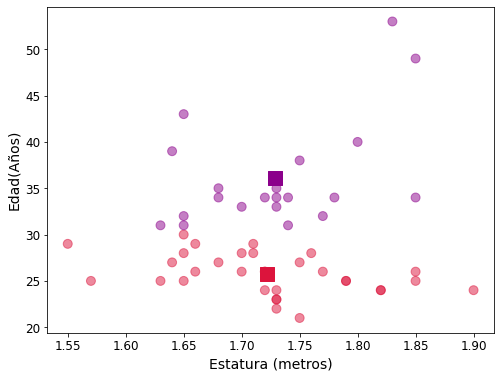

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1], 
            cmap = customcmap)
ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad(Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Experimento 1 - K = 3

In [130]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Estatura(metros)','Edad(Años)']], 3)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,2,0.261718
1,1.74,31,0,3.002244
2,1.72,24,2,2.733158
3,1.78,34,0,8.080096
4,1.65,32,0,0.010505


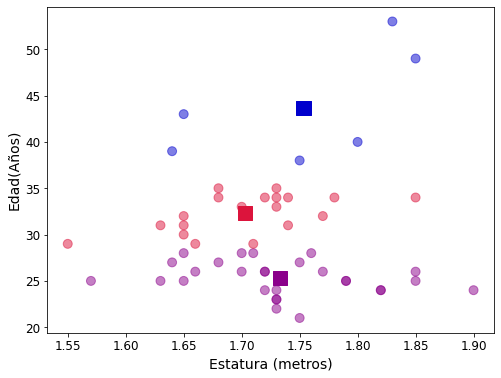

In [131]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2], 
            cmap = customcmap)
ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad(Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Experimento 1 - K = 4

In [132]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Estatura(metros)','Edad(Años)']], 4)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,2,3.992586
1,1.74,31,0,93.690599
2,1.72,24,3,0.000027
3,1.78,34,0,0.000252
4,1.65,32,0,19.907376


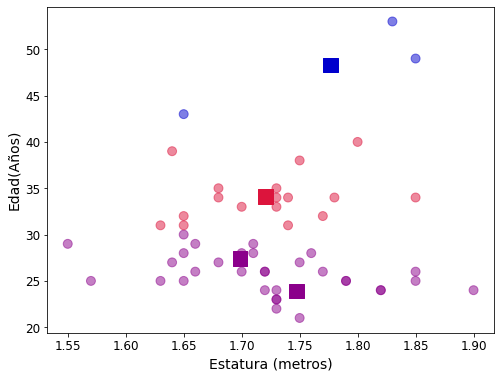

In [133]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3], 
            cmap = customcmap)
ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad(Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Experimento 1 - K = 5

In [134]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['Estatura(metros)','Edad(Años)']], 5)
df.head()

,Estatura(metros),Edad(Años),centroid,error
0,1.77,26,2,0.001824
1,1.74,31,0,2.936946
2,1.72,24,3,0.368981
3,1.78,34,1,1.778390
4,1.65,32,0,28.369453


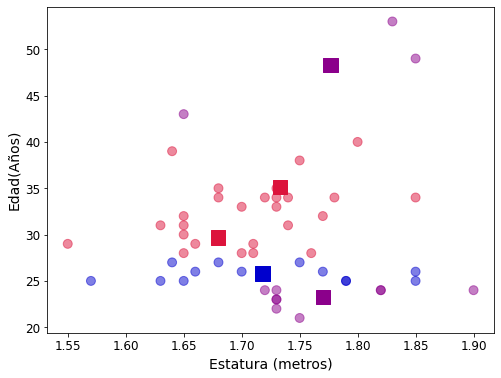

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o', 
            c=df['centroid'].astype('category'), 
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  
            marker = 's', s=200, c=[0, 1, 2, 3, 4], 
            cmap = customcmap)
ax.set_xlabel(r'Estatura (metros)', fontsize=14)
ax.set_ylabel(r'Edad(Años)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## GMM

**Librerías Adicionales**

In [137]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

#### Experimento 1 - K = 1

C:\Users\yuran\anaconda3\envs\UniversidadGalileo2022\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


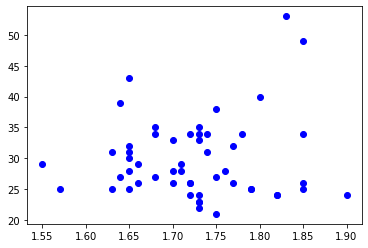

In [149]:
gmm = GaussianMixture(n_components=1)
gmm.fit(BBDD)

labels = gmm.predict(BBDD)
frame = pd.DataFrame(BBDD)
frame['cluster'] = labels
frame.columns = ['Estatura (metros)', 'Edad(Años)', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Estatura (metros)"],data["Edad(Años)"],c=color[k])
plt.show()

#### Experimento 1 - K = 2

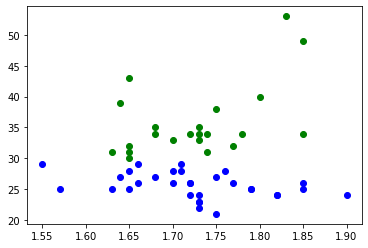

In [150]:
gmm = GaussianMixture(n_components=2)
gmm.fit(BBDD)

labels = gmm.predict(BBDD)
frame = pd.DataFrame(BBDD)
frame['cluster'] = labels
frame.columns = ['Estatura (metros)', 'Edad(Años)', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Estatura (metros)"],data["Edad(Años)"],c=color[k])
plt.show()

#### Experimento 1 - K = 3

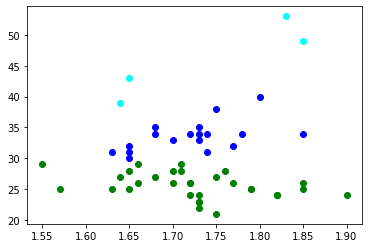

In [151]:
gmm = GaussianMixture(n_components=3)
gmm.fit(BBDD)

labels = gmm.predict(BBDD)
frame = pd.DataFrame(BBDD)
frame['cluster'] = labels
frame.columns = ['Estatura (metros)', 'Edad(Años)', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Estatura (metros)"],data["Edad(Años)"],c=color[k])
plt.show()

#### Experimento 1 - K = 4

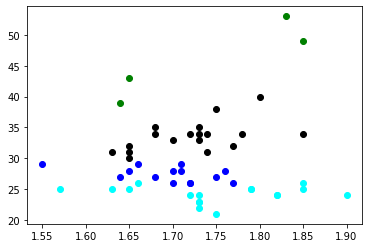

In [148]:
gmm = GaussianMixture(n_components=4)
gmm.fit(BBDD)

labels = gmm.predict(BBDD)
frame = pd.DataFrame(BBDD)
frame['cluster'] = labels
frame.columns = ['Estatura (metros)', 'Edad(Años)', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Estatura (metros)"],data["Edad(Años)"],c=color[k])
plt.show()

#### Experimento 1 - K = 5

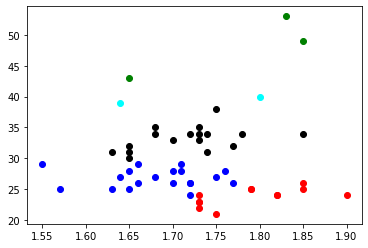

In [154]:
gmm = GaussianMixture(n_components=5)
gmm.fit(BBDD)

labels = gmm.predict(BBDD)
frame = pd.DataFrame(BBDD)
frame['cluster'] = labels
frame.columns = ['Estatura (metros)', 'Edad(Años)', 'cluster']

color=['blue','green','cyan', 'black','red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Estatura (metros)"],data["Edad(Años)"],c=color[k])
plt.show()

Sí es posible asignar una categoría a cada cluster con base en los experimentos realizados, especialmente cuando el valor de K es igual a 3. 

Es importante denotar que para la creación de estas categorías los límites de cada cluster deben ser establecidos con precisión dado que algunos de los datos en los extremos de clusters diferentes están muy próximos.

## Método de Codo

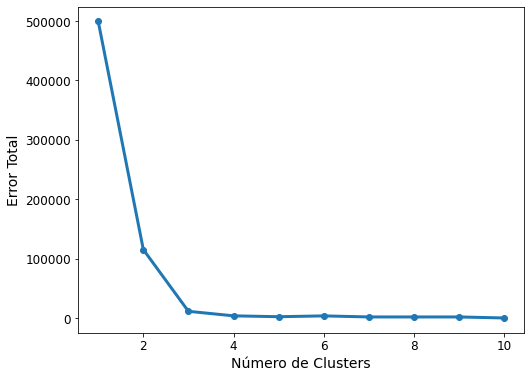

In [161]:
err_total = []
n = 10

df_elbow = BBDD[['Estatura(metros)','Edad(Años)']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Número de Clusters', fontsize=14)
ax.set_ylabel(r'Error Total', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

El método de codo sí es adecuado en este problema, y esta conclusión está respaldada por los experimentos previamente realizados en este documento.

En la gráfica se observa que el punto de inflexión o codo se produce entre el número de cluster 2 y 4, por lo que respaldado por la experimentación el valor de K=3 es el más adecuado para esta experimentación.

##  Estimaciones de Datos Normales y Estimación de Monte Carlo

In [216]:
BBDD2 = pd.read_csv("Estaturas2.csv",encoding='latin-1')

In [217]:
BBDD2

,Estatura(metros),Edad(años)
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


In [257]:
gm = GaussianMixture(n_components=3, random_state=0).fit(BBDD2)

In [247]:
def mixture_pdf(X,gmm):
  w = gmm.weights_ #pesos w
  means = gmm.means_ #medias de cada componente gaussiano
  covs = gmm.covariances_ #matrices de coovarianza de cada componente gaussiano

  pdf = (w[0]*multivariate_normal.pdf(BBDD2,mean=means[0],cov=covs[0])) + (w[1]*multivariate_normal.pdf(BBDD2,mean=means[1],cov=covs[1]))

  return pdf

In [250]:
print("Densidad de probabilidad para X:")
print(mixture_pdf(BBDD2,gm))

Densidad de probabilidad para X:
[3.49469409e-20 3.30383807e-09 7.65334738e-01 1.98943679e+04
 3.56174965e-01 3.56175446e-01 1.24316973e+00 8.75913811e-01]


In [251]:
gm.score_samples(BBDD2)

array([ 3.18353385,  3.18353385, -0.26744198,  9.89819195, -1.03233319,
       -1.03233184,  0.21766435, -0.13248758])

In [252]:
print("Densidad de probabilidad para X:")
np.exp(gm.score_samples(BBDD2))

Densidad de probabilidad para X:


array([2.41318816e+01, 2.41318816e+01, 7.65334738e-01, 1.98943679e+04,
       3.56174965e-01, 3.56175446e-01, 1.24316973e+00, 8.75913811e-01])

**Estimación de Monte Carlo:**

In [244]:
def g(x,y):
  Estatura = BBDD2.iloc[:,0]
  Edad = BBDD2.iloc[:,1]
    
  return (Estatura/Edad)

In [245]:
muestra,cluster = gm.sample(1000)

muestra_g = g(BBDD2['Estatura(metros)'],BBDD2['Edad(años)'])
valor_esperado_g = np.mean(muestra_g)

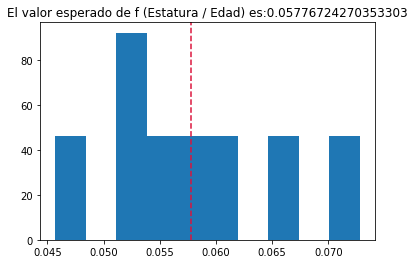

In [256]:
plt.hist(muestra_g, density=True)
plt.axvline(valor_esperado_g,color="Crimson",linestyle="--")
plt.title("El valor esperado de f (Estatura / Edad) es:{}".format(valor_esperado_g))

plt.show()